In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2021-01-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2021_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-01-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5175    ÏÇ¨ÏÉÅÍµ¨  14850    ÏÇ¨ÏÉÅÍµ¨   
1   2021-01-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë  11900    ÏÇ¨ÏÉÅÍµ¨  11900    ÏÇ¨ÏÉÅÍµ¨   
2   2021-01-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9310    ÏÇ¨ÏÉÅÍµ¨  10642    ÏÇ¨ÏÉÅÍµ¨   
3   2021-01-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4142    ÏÇ¨ÏÉÅÍµ¨   5625    ÏÇ¨ÏÉÅÍµ¨   
4   2021-01-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980    ÏÇ¨ÏÉÅÍµ¨   3490    ÏÇ¨ÏÉÅÍµ¨   
5   2021-01-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9980    ÏÇ¨ÏÉÅÍµ¨   9990    ÏÇ¨ÏÉÅÍµ¨   
6   2021-01-07     ÎåÄÌåå                      1.0„éè   3725    ÏÇ¨ÏÉÅÍµ¨   4290    ÏÇ¨ÏÉÅÍµ¨   
7   2021-01-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900    ÏÇ¨ÏÉÅÍµ¨  10450    ÏÇ¨ÏÉÅÍµ¨   
8   2021-01-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4415    ÏÇ¨ÏÉÅÍµ¨   4531    ÏÇ¨ÏÉÅÍµ¨   
9   2021-01-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨   3380    ÏÇ¨ÏÉÅÍµ¨   
10  2021-01-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540    ÏÇ¨ÏÉÅÍµ¨   1540    ÏÇ¨ÏÉÅÍµ¨   
11  2021-01-07      Î¨¥                   2.0„éè 1Í∞ú   3160    ÏÇ¨ÏÉÅÍµ¨   3322    ÏÇ¨ÏÉÅÍµ¨   
12  2021-01-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2890    ÏÇ¨ÏÉÅÍµ¨   3080    ÏÇ¨ÏÉÅÍµ¨   
13  2021-01-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2570    ÏÇ¨ÏÉÅÍµ¨   3200    ÏÇ¨ÏÉÅÍµ¨   
14  2021-01-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  43620    ÏÇ¨ÏÉÅÍµ¨  59940    ÏÇ¨ÏÉÅÍµ¨   
15  2021-01-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1580    ÏÇ¨ÏÉÅÍµ¨   1990    ÏÇ¨ÏÉÅÍµ¨   
16  2021-01-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3950    ÏÇ¨ÏÉÅÍµ¨   6930    ÏÇ¨ÏÉÅÍµ¨   
17  2021-01-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14990    ÏÇ¨ÏÉÅÍµ¨   
18  2021-01-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  21630    ÏÇ¨ÏÉÅÍµ¨  27000    ÏÇ¨ÏÉÅÍµ¨   
19  2021-01-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316    ÏÇ¨ÏÉÅÍµ¨   2325    ÏÇ¨ÏÉÅÍµ¨   
20  2021-01-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1680    ÏÇ¨ÏÉÅÍµ¨   1790    ÏÇ¨ÏÉÅÍµ¨   
21  2021-01-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2021-01-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  54125    ÏÇ¨ÏÉÅÍµ¨  58950    ÏÇ¨ÏÉÅÍµ¨   
23  2021-01-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4788    ÏÇ¨ÏÉÅÍµ¨   8340    ÏÇ¨ÏÉÅÍµ¨   
24  2021-01-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  58900    ÏÇ¨ÏÉÅÍµ¨  68900    ÏÇ¨ÏÉÅÍµ¨   
25  2021-01-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1992    ÏÇ¨ÏÉÅÍµ¨   3966    ÏÇ¨ÏÉÅÍµ¨   
26  2021-01-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   9920    ÏÇ¨ÏÉÅÍµ¨  12550    ÏÇ¨ÏÉÅÍµ¨   
27  2021-01-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÏÇ¨ÏÉÅÍµ¨    796    ÏÇ¨ÏÉÅÍµ¨   
28  2021-01-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8490    ÏÇ¨ÏÉÅÍµ¨   8580    ÏÇ¨ÏÉÅÍµ¨   
29  2021-01-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
30  2021-01-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300    ÏÇ¨ÏÉÅÍµ¨   3990    ÏÇ¨ÏÉÅÍµ¨   
31  2021-01-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15900    ÏÇ¨ÏÉÅÍµ¨  19900    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    9675  186.96%  10,013  
1       0     0.0%  11,900  
2    1332   14.31%   9,976  
3    1483    35.8%   4,884  
4     510   17.11%   3,235  
5      10     0.1%   9,985  
6     565   15.17%   4,008  
7     550    5.56%  10,175  
8     116    2.63%   4,473  
9    2704   400.0%   2,028  
10      0     0.0%   1,540  
11    162    5.13%   3,241  
12    190    6.57%   2,985  
13    630

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2021-04-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2021_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-04-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÏÉÅÍµ¨   9010    ÏÇ¨ÏÉÅÍµ¨   
1   2021-04-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5770    ÏÇ¨ÏÉÅÍµ¨   8417    ÏÇ¨ÏÉÅÍµ¨   
2   2021-04-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9970    ÏÇ¨ÏÉÅÍµ¨  10640    ÏÇ¨ÏÉÅÍµ¨   
3   2021-04-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5940    ÏÇ¨ÏÉÅÍµ¨   6523    ÏÇ¨ÏÉÅÍµ¨   
4   2021-04-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3780    ÏÇ¨ÏÉÅÍµ¨   3990    ÏÇ¨ÏÉÅÍµ¨   
5   2021-04-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9980    ÏÇ¨ÏÉÅÍµ¨   9990    ÏÇ¨ÏÉÅÍµ¨   
6   2021-04-08     ÎåÄÌåå                      1.0„éè   7475    ÏÇ¨ÏÉÅÍµ¨   8737    ÏÇ¨ÏÉÅÍµ¨   
7   2021-04-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900    ÏÇ¨ÏÉÅÍµ¨  11450    ÏÇ¨ÏÉÅÍµ¨   
8   2021-04-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3636    ÏÇ¨ÏÉÅÍµ¨   5194    ÏÇ¨ÏÉÅÍµ¨   
9   2021-04-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
10  2021-04-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540    ÏÇ¨ÏÉÅÍµ¨   1540    ÏÇ¨ÏÉÅÍµ¨   
11  2021-04-08      Î¨¥                   2.0„éè 1Í∞ú   1944    ÏÇ¨ÏÉÅÍµ¨   1980    ÏÇ¨ÏÉÅÍµ¨   
12  2021-04-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3190    ÏÇ¨ÏÉÅÍµ¨   
13  2021-04-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7670    ÏÇ¨ÏÉÅÍµ¨  11420    ÏÇ¨ÏÉÅÍµ¨   
14  2021-04-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  49920    ÏÇ¨ÏÉÅÍµ¨  67023    ÏÇ¨ÏÉÅÍµ¨   
15  2021-04-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2780    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
16  2021-04-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930    ÏÇ¨ÏÉÅÍµ¨   7239    ÏÇ¨ÏÉÅÍµ¨   
17  2021-04-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14990    ÏÇ¨ÏÉÅÍµ¨   
18  2021-04-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  23610    ÏÇ¨ÏÉÅÍµ¨  34975    ÏÇ¨ÏÉÅÍµ¨   
19  2021-04-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1983    ÏÇ¨ÏÉÅÍµ¨   2983    ÏÇ¨ÏÉÅÍµ¨   
20  2021-04-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1790    ÏÇ¨ÏÉÅÍµ¨   
21  2021-04-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2021-04-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  54835    ÏÇ¨ÏÉÅÍµ¨  62950    ÏÇ¨ÏÉÅÍµ¨   
23  2021-04-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4788    ÏÇ¨ÏÉÅÍµ¨   6950    ÏÇ¨ÏÉÅÍµ¨   
24  2021-04-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  58900    ÏÇ¨ÏÉÅÍµ¨  72900    ÏÇ¨ÏÉÅÍµ¨   
25  2021-04-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2211    ÏÇ¨ÏÉÅÍµ¨   3500    ÏÇ¨ÏÉÅÍµ¨   
26  2021-04-08    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   9970    ÏÇ¨ÏÉÅÍµ¨  11815    ÏÇ¨ÏÉÅÍµ¨   
27  2021-04-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    798    ÏÇ¨ÏÉÅÍµ¨    798    ÏÇ¨ÏÉÅÍµ¨   
28  2021-04-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8490    ÏÇ¨ÏÉÅÍµ¨   8490    ÏÇ¨ÏÉÅÍµ¨   
29  2021-04-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290    ÏÇ¨ÏÉÅÍµ¨   3400    ÏÇ¨ÏÉÅÍµ¨   
30  2021-04-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300    ÏÇ¨ÏÉÅÍµ¨   3390    ÏÇ¨ÏÉÅÍµ¨   
31  2021-04-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13900    ÏÇ¨ÏÉÅÍµ¨  19900    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1585  21.35%   8,218  
1    2647  45.88%   7,094  
2     670   6.72%  10,305  
3     583   9.81%   6,232  
4     210   5.56%   3,885  
5      10    0.1%   9,985  
6    1262  16.88%   8,106  
7    1550  15.66%  10,675  
8    1558  42.85%   4,415  
9       0    0.0%     676  
10      0    0.0%   1,540  
11     36   1.85%   1,962  
12    110   3.57%   3,135  
13   3750  48.89%   9,5

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2021-07-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2021_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-07-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5925    ÏÇ¨ÏÉÅÍµ¨  11925    ÏÇ¨ÏÉÅÍµ¨   
1   2021-07-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5770    ÏÇ¨ÏÉÅÍµ¨   8417    ÏÇ¨ÏÉÅÍµ¨   
2   2021-07-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  13245    ÏÇ¨ÏÉÅÍµ¨  14875    ÏÇ¨ÏÉÅÍµ¨   
3   2021-07-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5940    ÏÇ¨ÏÉÅÍµ¨   7160    ÏÇ¨ÏÉÅÍµ¨   
4   2021-07-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4300    ÏÇ¨ÏÉÅÍµ¨   4680    ÏÇ¨ÏÉÅÍµ¨   
5   2021-07-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8990    ÏÇ¨ÏÉÅÍµ¨  10800    ÏÇ¨ÏÉÅÍµ¨   
6   2021-07-08     ÎåÄÌåå                      1.0„éè   2250    ÏÇ¨ÏÉÅÍµ¨   2790    ÏÇ¨ÏÉÅÍµ¨   
7   2021-07-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12500    ÏÇ¨ÏÉÅÍµ¨  12500    ÏÇ¨ÏÉÅÍµ¨   
8   2021-07-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194    ÏÇ¨ÏÉÅÍµ¨   5194    ÏÇ¨ÏÉÅÍµ¨   
9   2021-07-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
10  2021-07-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540    ÏÇ¨ÏÉÅÍµ¨   1540    ÏÇ¨ÏÉÅÍµ¨   
11  2021-07-08      Î¨¥                   2.0„éè 1Í∞ú   1666    ÏÇ¨ÏÉÅÍµ¨   2700    ÏÇ¨ÏÉÅÍµ¨   
12  2021-07-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3090    ÏÇ¨ÏÉÅÍµ¨   
13  2021-07-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7720    ÏÇ¨ÏÉÅÍµ¨   9150    ÏÇ¨ÏÉÅÍµ¨   
14  2021-07-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  42720    ÏÇ¨ÏÉÅÍµ¨  67023    ÏÇ¨ÏÉÅÍµ¨   
15  2021-07-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3200    ÏÇ¨ÏÉÅÍµ¨   3300    ÏÇ¨ÏÉÅÍµ¨   
16  2021-07-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3950    ÏÇ¨ÏÉÅÍµ¨   6930    ÏÇ¨ÏÉÅÍµ¨   
17  2021-07-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14990    ÏÇ¨ÏÉÅÍµ¨   
18  2021-07-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  29950    ÏÇ¨ÏÉÅÍµ¨  34975    ÏÇ¨ÏÉÅÍµ¨   
19  2021-07-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2566    ÏÇ¨ÏÉÅÍµ¨   2566    ÏÇ¨ÏÉÅÍµ¨   
20  2021-07-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1790    ÏÇ¨ÏÉÅÍµ¨   
21  2021-07-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2021-07-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  56900    ÏÇ¨ÏÉÅÍµ¨  64950    ÏÇ¨ÏÉÅÍµ¨   
23  2021-07-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5148    ÏÇ¨ÏÉÅÍµ¨   5480    ÏÇ¨ÏÉÅÍµ¨   
24  2021-07-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  59900    ÏÇ¨ÏÉÅÍµ¨  69500    ÏÇ¨ÏÉÅÍµ¨   
25  2021-07-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1933    ÏÇ¨ÏÉÅÍµ¨   2181    ÏÇ¨ÏÉÅÍµ¨   
26  2021-07-08    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)  11800    ÏÇ¨ÏÉÅÍµ¨  11810    ÏÇ¨ÏÉÅÍµ¨   
27  2021-07-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    794    ÏÇ¨ÏÉÅÍµ¨    798    ÏÇ¨ÏÉÅÍµ¨   
28  2021-07-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8480    ÏÇ¨ÏÉÅÍµ¨   8990    ÏÇ¨ÏÉÅÍµ¨   
29  2021-07-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
30  2021-07-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300    ÏÇ¨ÏÉÅÍµ¨   3300    ÏÇ¨ÏÉÅÍµ¨   
31  2021-07-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  14900    ÏÇ¨ÏÉÅÍµ¨  19900    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6000  101.27%   8,925  
1    2647   45.88%   7,094  
2    1630   12.31%  14,060  
3    1220   20.54%   6,550  
4     380    8.84%   4,490  
5    1810   20.13%   9,895  
6     540    24.0%   2,520  
7       0     0.0%  12,500  
8       0     0.0%   5,194  
9       0     0.0%     676  
10      0     0.0%   1,540  
11   1034   62.06%   2,183  
12     10    0.32%   3,085  
13   1430

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2021-10-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2021_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-10-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5925    ÏÇ¨ÏÉÅÍµ¨  11925    ÏÇ¨ÏÉÅÍµ¨   
1   2021-10-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   8417    ÏÇ¨ÏÉÅÍµ¨   9264    ÏÇ¨ÏÉÅÍµ¨   
2   2021-10-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   8428    ÏÇ¨ÏÉÅÍµ¨  15800    ÏÇ¨ÏÉÅÍµ¨   
3   2021-10-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4987    ÏÇ¨ÏÉÅÍµ¨   5483    ÏÇ¨ÏÉÅÍµ¨   
4   2021-10-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3980    ÏÇ¨ÏÉÅÍµ¨   4300    ÏÇ¨ÏÉÅÍµ¨   
5   2021-10-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè  10480    ÏÇ¨ÏÉÅÍµ¨  12990    ÏÇ¨ÏÉÅÍµ¨   
6   2021-10-07     ÎåÄÌåå                      1.0„éè   3100    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
7   2021-10-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950    ÏÇ¨ÏÉÅÍµ¨  14900    ÏÇ¨ÏÉÅÍµ¨   
8   2021-10-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194    ÏÇ¨ÏÉÅÍµ¨   5194    ÏÇ¨ÏÉÅÍµ¨   
9   2021-10-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736    ÏÇ¨ÏÉÅÍµ¨    736    ÏÇ¨ÏÉÅÍµ¨   
10  2021-10-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1540    ÏÇ¨ÏÉÅÍµ¨   1540    ÏÇ¨ÏÉÅÍµ¨   
11  2021-10-07      Î¨¥                   2.0„éè 1Í∞ú   1766    ÏÇ¨ÏÉÅÍµ¨   2560    ÏÇ¨ÏÉÅÍµ¨   
12  2021-10-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3090    ÏÇ¨ÏÉÅÍµ¨   
13  2021-10-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6660    ÏÇ¨ÏÉÅÍµ¨   9340    ÏÇ¨ÏÉÅÍµ¨   
14  2021-10-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  43620    ÏÇ¨ÏÉÅÍµ¨  56400    ÏÇ¨ÏÉÅÍµ¨   
15  2021-10-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4988    ÏÇ¨ÏÉÅÍµ¨   5340    ÏÇ¨ÏÉÅÍµ¨   
16  2021-10-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4480    ÏÇ¨ÏÉÅÍµ¨   6930    ÏÇ¨ÏÉÅÍµ¨   
17  2021-10-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12500    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
18  2021-10-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   7500    ÏÇ¨ÏÉÅÍµ¨  19800    ÏÇ¨ÏÉÅÍµ¨   
19  2021-10-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2066    ÏÇ¨ÏÉÅÍµ¨   2566    ÏÇ¨ÏÉÅÍµ¨   
20  2021-10-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780    ÏÇ¨ÏÉÅÍµ¨   1950    ÏÇ¨ÏÉÅÍµ¨   
21  2021-10-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2021-10-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  58800    ÏÇ¨ÏÉÅÍµ¨  66635    ÏÇ¨ÏÉÅÍµ¨   
23  2021-10-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÏÉÅÍµ¨   7860    ÏÇ¨ÏÉÅÍµ¨   
24  2021-10-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  56900    ÏÇ¨ÏÉÅÍµ¨  68900    ÏÇ¨ÏÉÅÍµ¨   
25  2021-10-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1377    ÏÇ¨ÏÉÅÍµ¨   2700    ÏÇ¨ÏÉÅÍµ¨   
26  2021-10-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)  11800    ÏÇ¨ÏÉÅÍµ¨  11812    ÏÇ¨ÏÉÅÍµ¨   
27  2021-10-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    848    ÏÇ¨ÏÉÅÍµ¨    880    ÏÇ¨ÏÉÅÍµ¨   
28  2021-10-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8480    ÏÇ¨ÏÉÅÍµ¨   9290    ÏÇ¨ÏÉÅÍµ¨   
29  2021-10-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
30  2021-10-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2850    ÏÇ¨ÏÉÅÍµ¨   2890    ÏÇ¨ÏÉÅÍµ¨   
31  2021-10-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  17900    ÏÇ¨ÏÉÅÍµ¨  19900    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6000  101.27%   8,925  
1     847   10.06%   8,841  
2    7372   87.47%  12,114  
3     496    9.95%   5,235  
4     320    8.04%   4,140  
5    2510   23.95%  11,735  
6     190    6.13%   3,195  
7    4950   49.75%  12,425  
8       0     0.0%   5,194  
9       0     0.0%     736  
10      0     0.0%   1,540  
11    794   44.96%   2,163  
12     10    0.32%   3,085  
13   2680

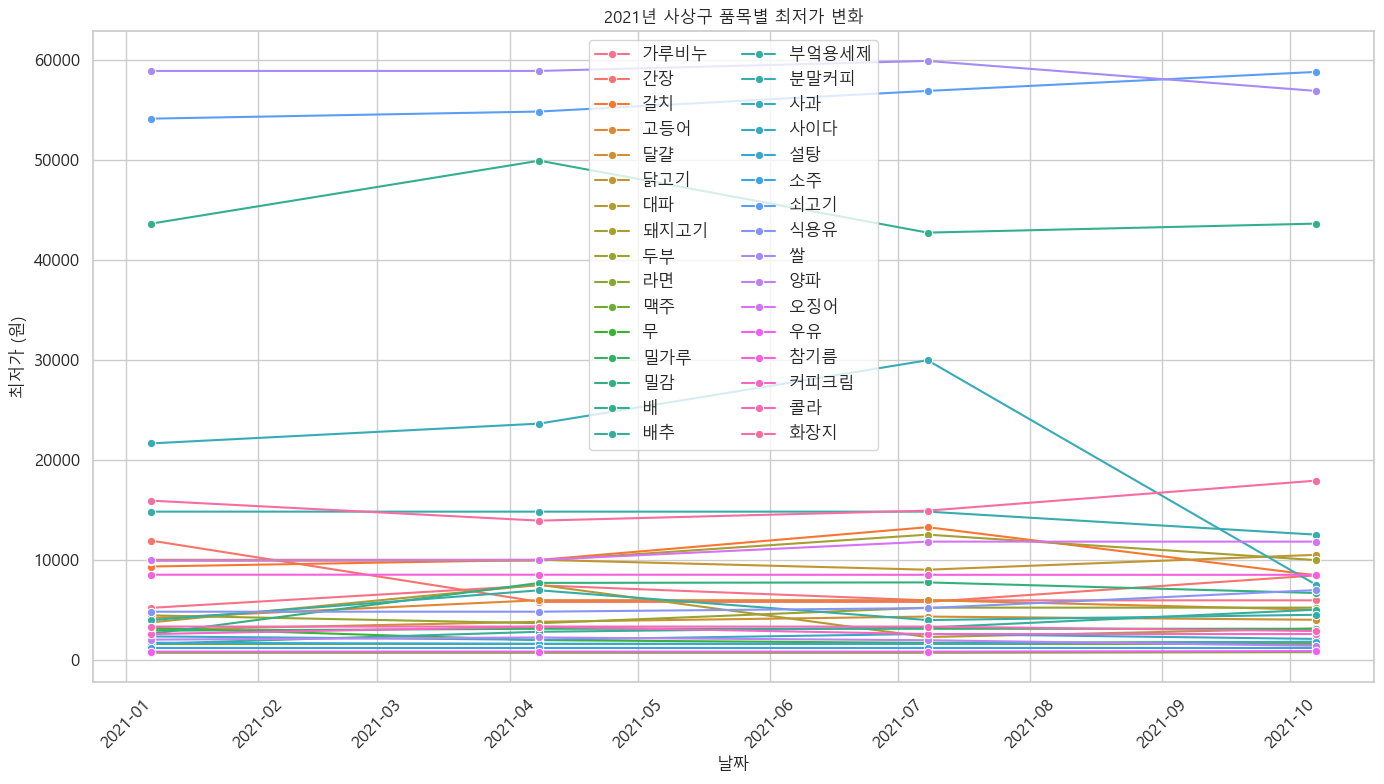

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2021_min.csv", index=False, encoding="utf-8-sig")

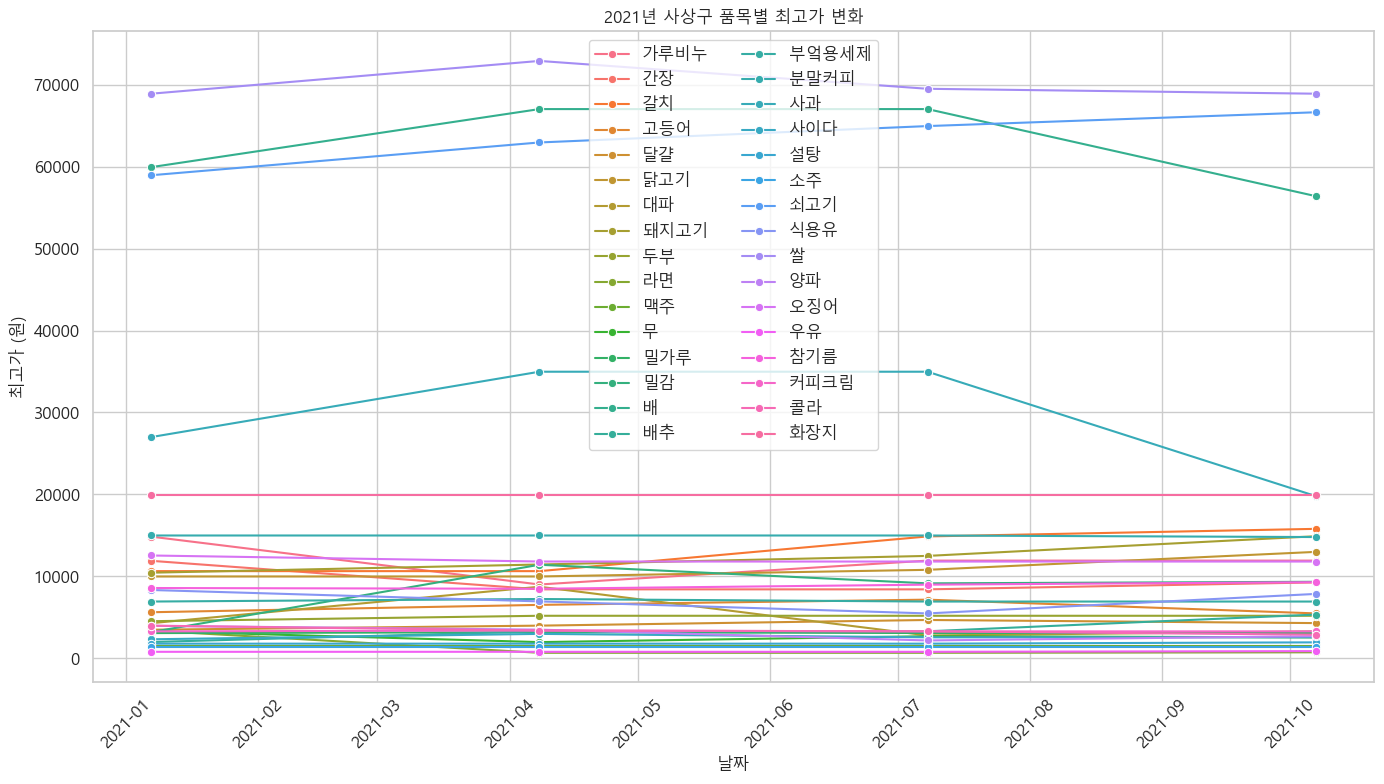

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2021_max.csv", index=False, encoding="utf-8-sig")